1. Importação das Bibliotecas

In [4]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

# Configurações gerais
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
from google.colab import files
uploaded = files.upload()


Saving olist_order_items_dataset.csv to olist_order_items_dataset (1).csv
Saving olist_orders_dataset.csv to olist_orders_dataset (1).csv
Saving olist_products_dataset.csv to olist_products_dataset (1).csv


2. Carregamento dos Datasets

In [6]:
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")


3. Merge dos Dados

In [7]:
df = (orders
      .merge(items, on="order_id", how="left")
      .merge(products, on="product_id", how="left")
     )


4. EDA Inicial

In [8]:
# 4.1 Estrutura Geral
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,113425,113425,113425,113425,113264,111457,110196,113425,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,21,110197,21,23,48,21,611,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


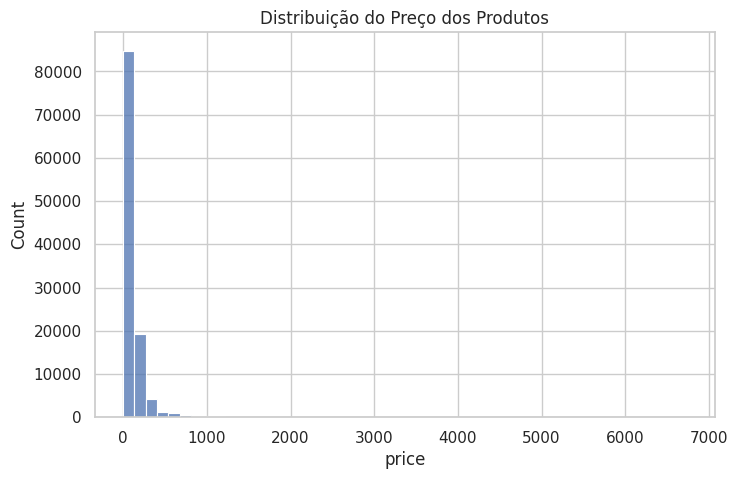

In [9]:
#4.2 Histograma de Preços
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50)
plt.title("Distribuição do Preço dos Produtos")
plt.show()

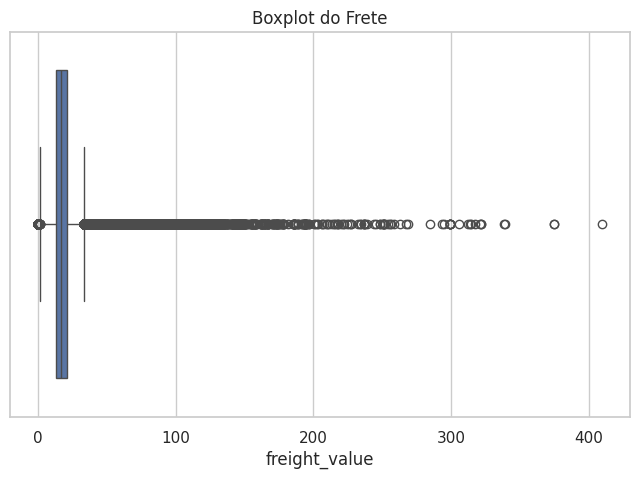

In [10]:
#4.3 Boxplot de Frete
plt.figure(figsize=(8,5))
sns.boxplot(x=df["freight_value"])
plt.title("Boxplot do Frete")
plt.show()

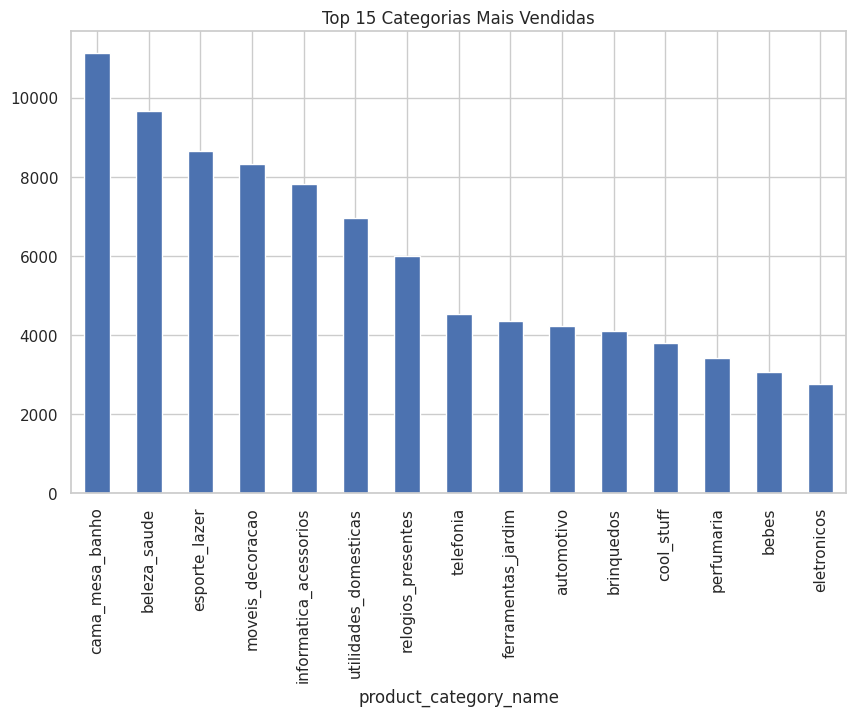

In [11]:
#4.4 Categorias mais Frequentes
plt.figure(figsize=(10,6))
df["product_category_name"].value_counts().head(15).plot.bar()
plt.title("Top 15 Categorias Mais Vendidas")
plt.show()

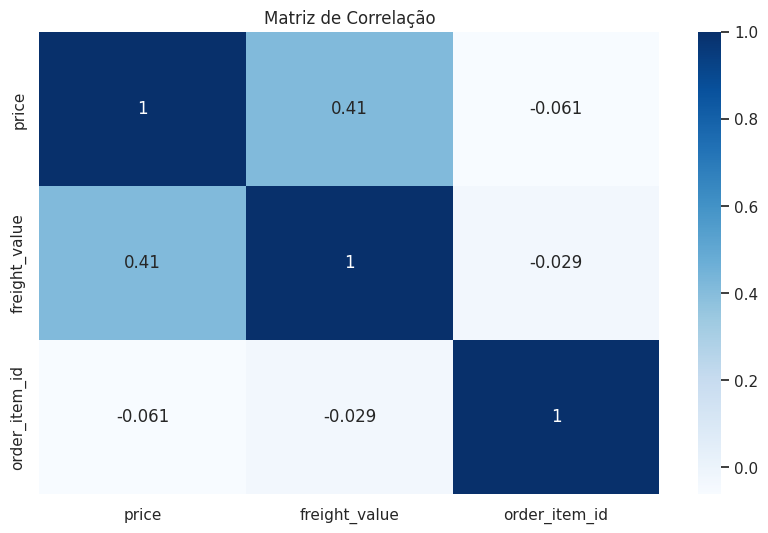

In [12]:
#4.5 Correlação (numérica)
plt.figure(figsize=(10,6))
sns.heatmap(df[["price","freight_value","order_item_id"]].corr(), annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

🧹 5. Limpeza de Dados

In [13]:
#5.1 Remoção de duplicatas
df.drop_duplicates(inplace=True)

In [14]:
#5.2 Padronização de textos (apenas colunas semânticas)

df["product_category_name"] = df["product_category_name"].astype(str).str.lower().str.strip()
df["order_status"] = df["order_status"].astype(str).str.lower().str.strip()

In [15]:
#5.3 Tratamento de valores ausentes
# Dimensões e peso dos produtos → mediana
for col in ["product_weight_g","product_length_cm","product_height_cm","product_width_cm"]:
    df[col].fillna(df[col].median(), inplace=True)

# Categóricos
df["product_category_name"] = df["product_category_name"].fillna("missing")

/tmp/ipython-input-2930950098.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [16]:
#5.4 Conversão de tipos
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

6. Detecção e Tratamento de Outliers (IQR + Capping)

In [17]:
def iqr_capping(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in ["price","freight_value"]:
    iqr_capping(col)


7. Feature Engineering (4 features obrigatórias)

In [18]:
#7.1 Tempo de Entrega
df["tempo_entrega"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

In [19]:
#7.2 Dias de Atraso
df["dias_atraso"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

df["dias_atraso"] = df["dias_atraso"].apply(lambda x: x if x > 0 else 0)

In [20]:
#7.3 Número de Itens (por pedido)
df["n_items"] = df.groupby("order_id")["order_item_id"].transform("count")

In [21]:
#7.4 Valor Total do Pedido
df["valor_total_pedido"] = df.groupby("order_id")["price"].transform("sum")

8. Tratamento de Categóricos

In [22]:
# Agrupamento das categorias raras (< 100 ocorrências)
freq = df["product_category_name"].value_counts()
rare = freq[freq < 100].index
df["product_category_name"] = df["product_category_name"].replace(rare, "other")

9. Normalização / Padronização

In [23]:
# === Selecionar colunas numéricas que serão escaladas ===

numeric_cols = [c for c in ['valor_total_pedido','price','freight_value','n_items'] if c in df.columns]
print("Colunas numéricas selecionadas:", numeric_cols)

Colunas numéricas selecionadas: ['valor_total_pedido', 'price', 'freight_value', 'n_items']


In [24]:
# === Preparar dados para o scaler ===

df_for_scale = df[numeric_cols].copy()

# Preencher NaNs com a mediana apenas para o scaler (sem alterar o df original)
for c in df_for_scale.columns:
    if df_for_scale[c].isna().any():
        med = df_for_scale[c].median()
        df_for_scale[c] = df_for_scale[c].fillna(med)

In [25]:
# === Criar e ajustar os scalers ===
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()
scaler_mm  = MinMaxScaler()

# Fit + transform
arr_std = scaler_std.fit_transform(df_for_scale.values)
arr_mm  = scaler_mm.fit_transform(df_for_scale.values)


In [26]:
# === Criar as novas colunas escaladas com sufixos ===

for i, c in enumerate(numeric_cols):
    df[c + '_std'] = arr_std[:, i]   # padronizado
    df[c + '_mm']  = arr_mm[:, i]    # normalizado

print("Novas colunas criadas: *_std e *_mm")

Novas colunas criadas: *_std e *_mm


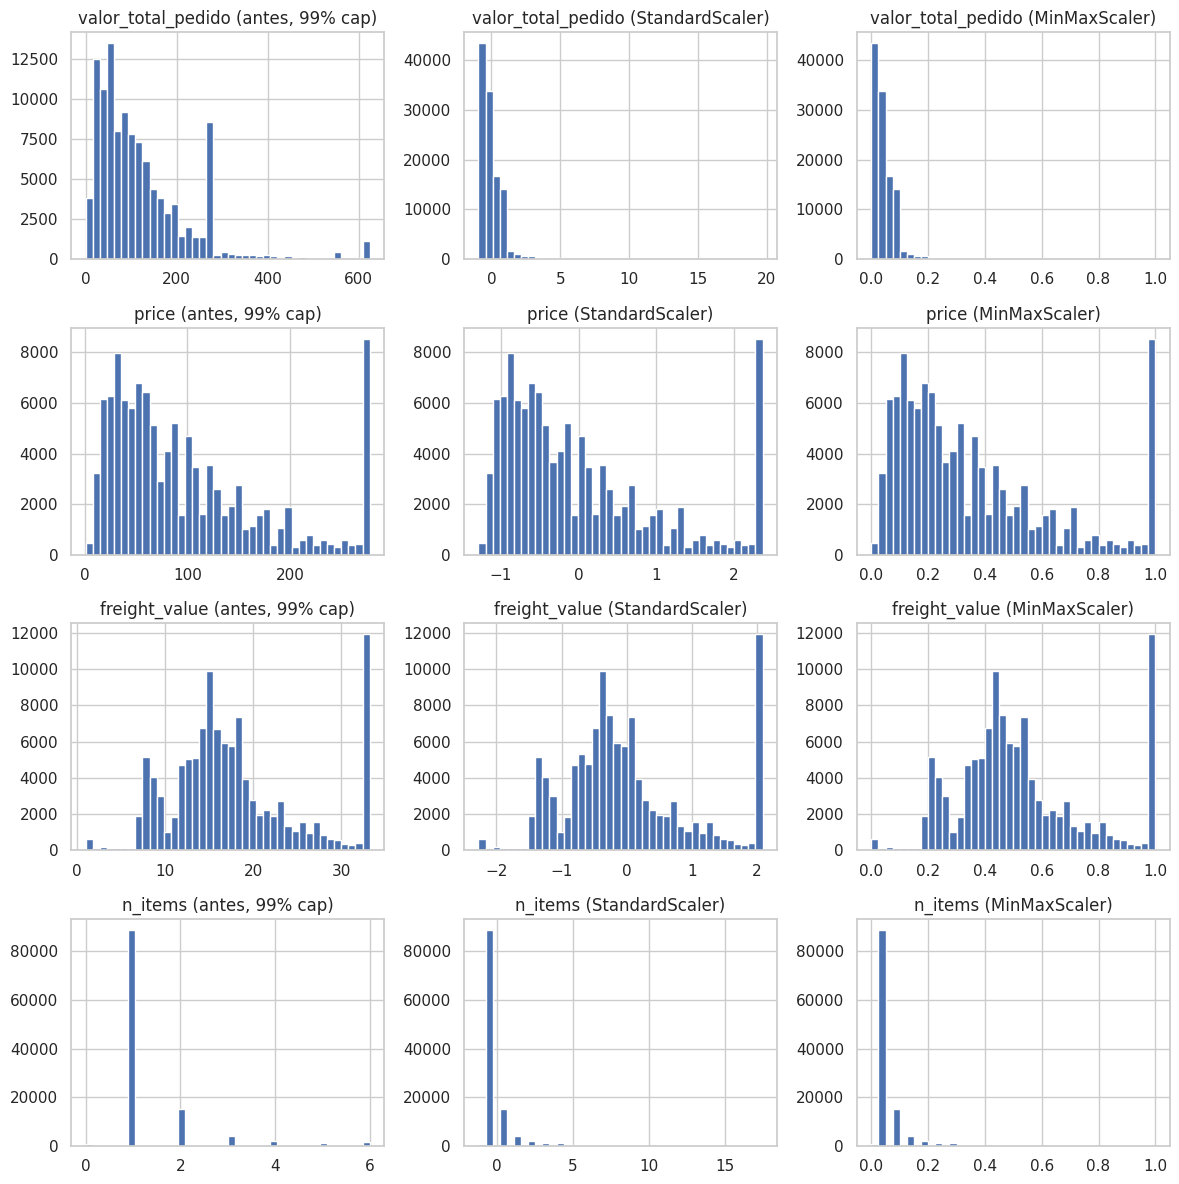

In [27]:
# === Gráficos comparativos (antes / depois) ===
import matplotlib.pyplot as plt
import math

n = len(numeric_cols)
plt.figure(figsize=(12, 3 * n))

for i, c in enumerate(numeric_cols):

    # 1 — Histograma antes do scaling
    plt.subplot(n, 3, 3*i + 1)
    plt.hist(df[c].dropna().clip(upper=df[c].quantile(0.99)), bins=40)
    plt.title(f"{c} (antes, 99% cap)")

    # 2 — StandardScaler
    plt.subplot(n, 3, 3*i + 2)
    plt.hist(df[c + '_std'].dropna(), bins=40)
    plt.title(f"{c} (StandardScaler)")

    # 3 — MinMaxScaler
    plt.subplot(n, 3, 3*i + 3)
    plt.hist(df[c + '_mm'].dropna(), bins=40)
    plt.title(f"{c} (MinMaxScaler)")

plt.tight_layout()
plt.show()

In [28]:
# === Exemplo de inverse_transform (como desfazer a escala) ===

demo_col = numeric_cols[0]

# pegar um índice válido
idx = df[demo_col].dropna().index[0]
real_val = df.loc[idx, demo_col]

scaled_std_val = df.loc[idx, demo_col + '_std']
scaled_mm_val  = df.loc[idx, demo_col + '_mm']

orig_from_std = scaler_std.inverse_transform(
    [[scaled_std_val if j==0 else 0 for j in range(len(numeric_cols))]]
)[0][0]

orig_from_mm = scaler_mm.inverse_transform(
    [[scaled_mm_val if j==0 else 0 for j in range(len(numeric_cols))]]
)[0][0]

print("Exemplo usando coluna:", demo_col)
print("Valor real:", real_val)
print("StandardScaler ->", orig_from_std)
print("MinMaxScaler ->", orig_from_mm)

Exemplo usando coluna: valor_total_pedido
Valor real: 29.99
StandardScaler -> 29.989999999999995
MinMaxScaler -> 29.99


10. Seleção de Atributos

In [29]:
#Variância Baixa
selector = VarianceThreshold(threshold=0.0)

In [30]:
#Correlação
df[["price","freight_value","tempo_entrega","dias_atraso"]].corr()

,price,freight_value,tempo_entrega,dias_atraso
price,1.000000,0.432409,0.091966,0.027107
freight_value,0.432409,1.000000,0.303573,0.049943
tempo_entrega,0.091966,0.303573,1.000000,0.692940
dias_atraso,0.027107,0.049943,0.692940,1.000000


11. Pipeline Completo de Pré-Processamento

In [31]:
#11.1 Separando tipos
num_cols = ["price","freight_value","product_weight_g",
            "tempo_entrega","dias_atraso","n_items","valor_total_pedido"]

cat_cols = ["product_category_name","order_status"]

In [32]:
#11.2 Transformadores
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [33]:
#11.3 ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

12. Execução do Pipeline

In [34]:
X_processed = preprocess.fit_transform(df)
X_processed.shape

(113425, 70)

13. Exportando Base Final

In [35]:
df.to_csv("olist_final_limpo.csv", index=False)
